In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../Data/data.csv') 
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

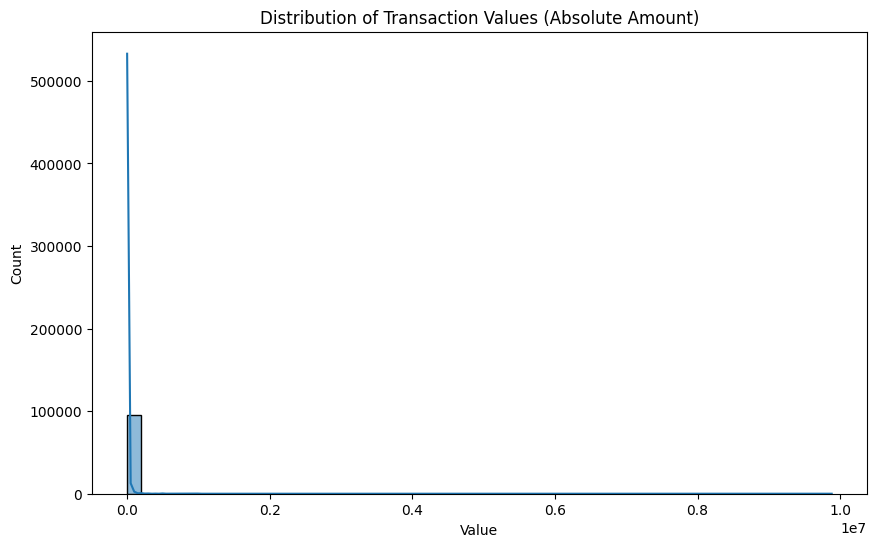

In [6]:
# Distribution of Transaction Amounts (Numerical Analysis) 
plt.figure(figsize=(10, 6))
# Using 'Value' because 'Amount' has negatives for credits 
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Transaction Values (Absolute Amount)')
plt.show()

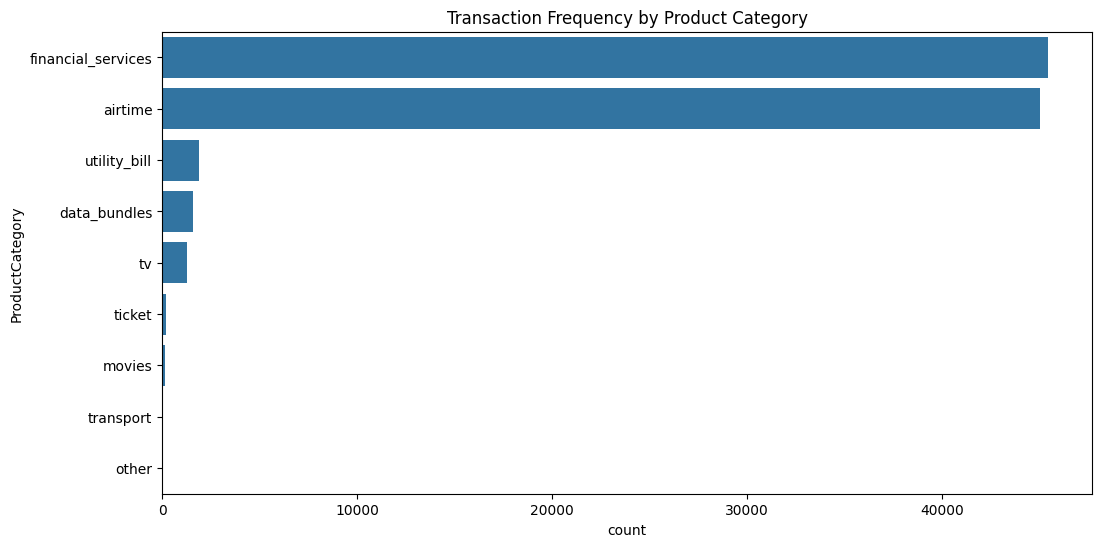

In [7]:
# Product Category Popularity (Categorical Analysis) 
plt.figure(figsize=(12, 6))
sns.countplot(y='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index)
plt.title('Transaction Frequency by Product Category')
plt.show()

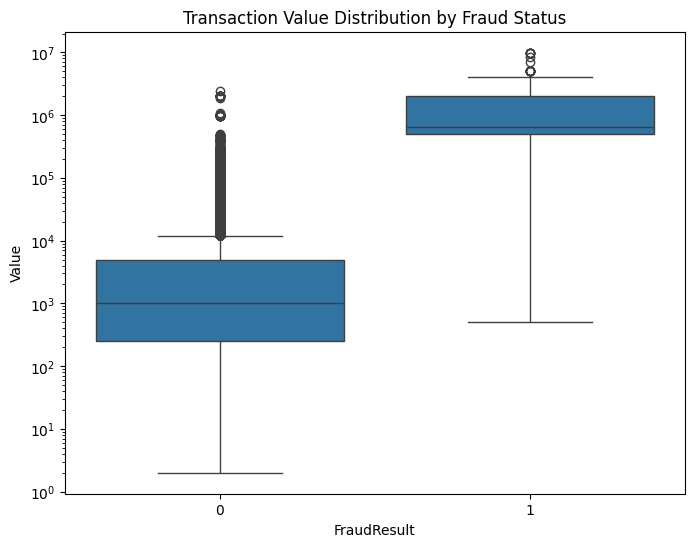

In [8]:
# Fraud Analysis (Correlation)
# Check if higher values correlate with FraudResult
plt.figure(figsize=(8, 6))
sns.boxplot(x='FraudResult', y='Value', data=df)
plt.title('Transaction Value Distribution by Fraud Status')
plt.yscale('log') # Log scale helps visualization if outliers exist
plt.show()


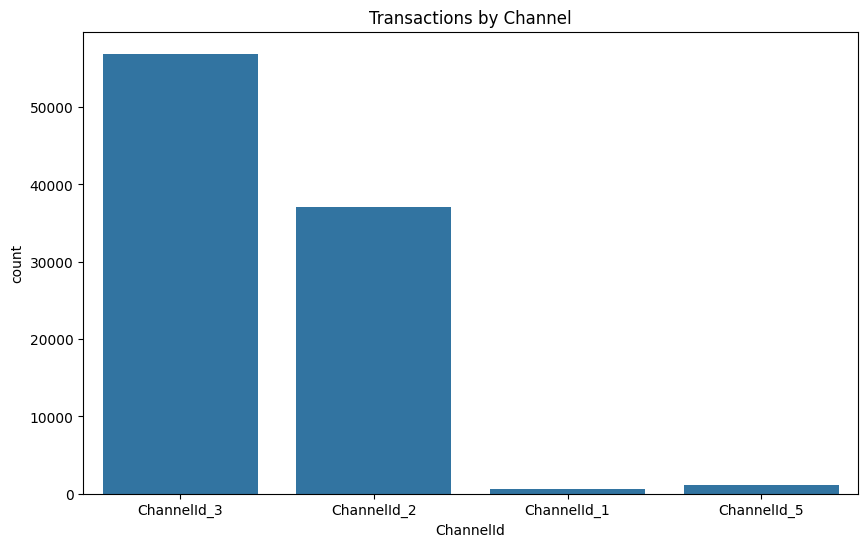

In [9]:

# Channel Usage
plt.figure(figsize=(10, 6))
sns.countplot(x='ChannelId', data=df)
plt.title('Transactions by Channel')
plt.show()

##  Top 5 Most Important Insights from EDA

### 1. **Extreme Skewness and Outliers in Transaction Value (Feature Scaling Required)**

* **Observation:** The `Distribution of Transaction Values` chart shows an extreme right-skew, with nearly all transactions clustered near zero on the horizontal axis. The descriptive statistics confirm a massive difference between the 75th percentile (5,000 UGX) and the maximum value ($9.88 \times 10^6$ UGX).
* **Implication:** The distribution is highly non-normal and heavily influenced by large-value outliers. During feature engineering, the `Value` (and `Amount`) column **must be scaled** (e.g., Standardization or Normalization) or transformed (e.g., Log transformation) to prevent the model from being disproportionately dominated by these high-value transactions. 
### 2. **High Correlation Between Transaction Value and Fraud (Key Predictor)**

* **Observation:** The `Transaction Value Distribution by Fraud Status` box plot clearly shows that transactions marked as Fraud (`FraudResult = 1`) have significantly higher values than non-fraudulent transactions (`FraudResult = 0`). The median value for fraudulent transactions is orders of magnitude larger than for non-fraudulent ones.
* **Implication:** This strong relationship suggests that a customer's **Monetary** value (M in RFM) will be a crucial predictor not only of their credit risk proxy but also for fraud detection. We can hypothesize that customers engaging in large transactions may represent a higher-risk segment.

### 3. **Dominance of Financial Services and Airtime (Segmentation Potential)**

* **Observation:** The `Transaction Frequency by Product Category` bar chart reveals that two categories, `financial_services` and `airtime`, account for the vast majority of transactions. The count for these two categories is nearly equal and completely dwarfs all other categories (`utility_bill`, `data_bundles`, etc.).
* **Implication:** The customer base can be primarily segmented based on their consumption type. We must engineer features that quantify a customer's usage in these top two categories (e.g., count of financial service transactions vs. count of airtime transactions) as these behaviors likely represent different needs and, therefore, different credit risk profiles.

### 4. **Prevalence of Channel 3 and Channel 2 (Focus for Deployment)**

* **Observation:** The `Transactions by Channel` chart shows that `ChannelId_3` and `ChannelId_2` are the overwhelmingly dominant channels for transactions, with `ChannelId_1` and `ChannelId_5` being minimal.
* **Implication:** While all channels should be encoded, the business impact is concentrated in Channels 3 and 2. During API development (Task 6), the deployment environment and data validation should prioritize seamless operation for data flowing from these two primary channels.

### 5. **No Missing Data (Simplified Data Processing)**

* **Observation:** The `df.info()` output shows that all 16 columns have 95,662 non-null entries, which matches the total `RangeIndex`.
* **Implication:** The data cleaning step for **handling missing values (Task 3)** can be entirely skipped, significantly simplifying the data processing and feature engineering pipeline (`data_processing.py`).

***